

---




ライブラリのインポート

In [3]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [4]:
rating = pd.read_csv('rating.csv')
anime = pd.read_csv('anime.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



データの内容の確認

上の部分を表示

In [6]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
rating.tail()

,user_id,anime_id,rating
950485,8655,1453.0,10.0
950486,8655,1525.0,10.0
950487,8655,1526.0,7.0
950488,8655,1527.0,10.0
950489,8655,NaN,NaN


アニメの人気順に順番を変更

In [8]:
anime.sort_values('members', ascending= False)[:10]

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817


animeの基本統計量を確認

人気と不人気の格差が激しい

In [9]:
round(anime.describe(),2)

,anime_id,rating,members
count,12294.00,12064.00,12294.00
mean,14058.22,6.47,18071.34
std,11455.29,1.03,54820.68
min,1.00,1.67,5.00
25%,3484.25,5.88,225.00
50%,10260.50,6.57,1550.00
75%,24794.50,7.18,9437.00
max,34527.00,10.00,1013917.00


ratingの基本統計量を確認

-1が存在
アニメを観たが評価しなかったユーザーがいる

In [10]:
round(rating.describe(),2)

,user_id,anime_id,rating
count,950490.00,950489.00,950489.00
mean,4577.41,8480.74,6.17
std,2475.44,8809.57,3.68
min,1.00,1.00,-1.00
25%,2450.00,1033.00,6.00
50%,4865.00,5262.00,7.00
75%,6709.00,13377.00,9.00
max,8655.00,34325.00,10.00


評価の分散を可視化

評価してないユーザーは多い

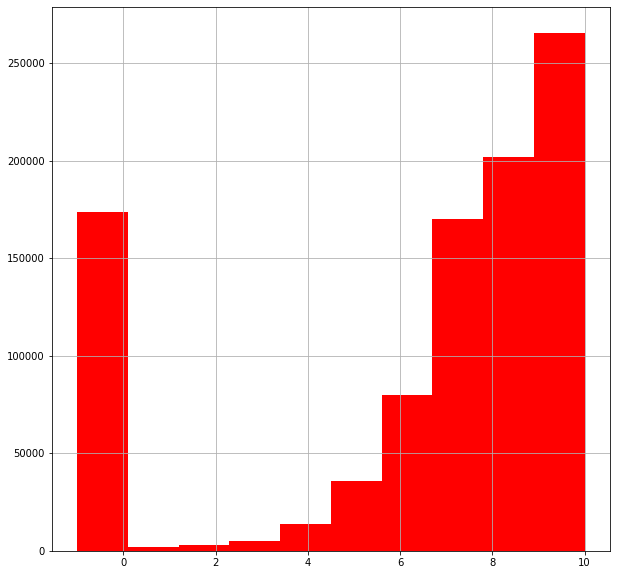

In [11]:
rating['rating'].hist(figsize=(10,10), color = 'red')



---



データの前処理

membersが1000以下のデータを足切り

不人気のアニメを削除

In [12]:
anime = anime[anime['members'] > 1000]

欠損値の確認

少ないため削除

In [13]:
anime.isnull().sum()

anime_id      0
name          0
genre         6
type         15
episodes      0
rating      150
members       0
dtype: int64

In [14]:
anime = anime.dropna()

In [15]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

評価をしていないユーザーの削除

minが１になった

In [16]:
rating = rating[rating.rating >= 0]

In [17]:
round(rating.describe(),2)

,user_id,anime_id,rating
count,776873.00,776873.00,776873.00
mean,4619.13,8439.19,7.78
std,2464.67,8786.41,1.57
min,1.00,1.00,1.00
25%,2544.00,1015.00,7.00
50%,4932.00,5220.00,8.00
75%,6758.00,13271.00,9.00
max,8655.00,34325.00,10.00


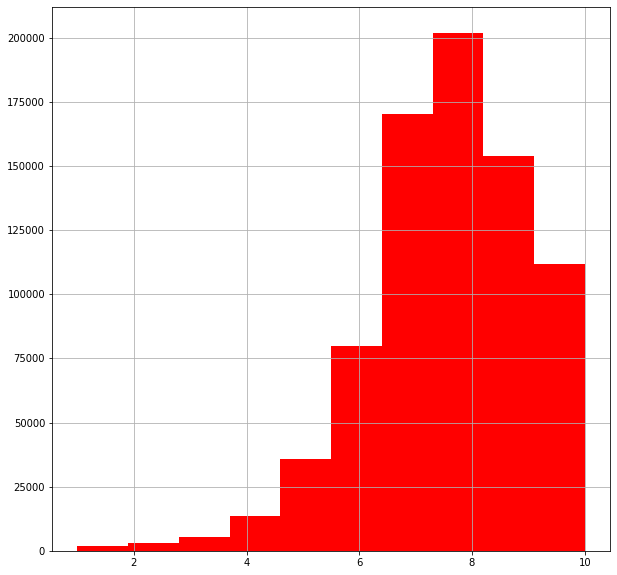

In [18]:
rating['rating'].hist(figsize=(10,10), color = 'red')

anime_idを軸にしてuser_id毎に切り分けてマージさせる

mergeddf

使わないデータを削除

上の部分を表示

In [19]:
mergeddf = rating.merge(anime, left_on = 'anime_id', right_on = 'anime_id', suffixes= ['_user', ''])

mergeddf = mergeddf[['user_id','name','rating_user','genre','type']]
mergeddf = mergeddf.drop_duplicates(['user_id','name'])

mergeddf.head()

,user_id,name,rating_user,genre,type
0,1,Highschool of the Dead,10.0,"Action, Ecchi, Horror, Supernatural",TV
1,3,Highschool of the Dead,6.0,"Action, Ecchi, Horror, Supernatural",TV
2,5,Highschool of the Dead,2.0,"Action, Ecchi, Horror, Supernatural",TV
3,12,Highschool of the Dead,6.0,"Action, Ecchi, Horror, Supernatural",TV
4,14,Highschool of the Dead,6.0,"Action, Ecchi, Horror, Supernatural",TV


基本統計量の確認

In [20]:
round(mergeddf.describe(),2)

,user_id,rating_user
count,774428.00,774428.00
mean,4616.56,7.78
std,2464.65,1.57
min,1.00,1.00
25%,2541.00,7.00
50%,4924.00,8.00
75%,6750.00,9.00
max,8655.00,10.00




---



以下の入力（＊の所）を済ませここから実行する

＊ジャンルと形式（映画など）を絞る

In [21]:
mergeddf=mergeddf.set_index('type')
mergeddf=mergeddf.drop(['Movie','OVA','ONA','Special','Music'])#＊('TV','Movie','OVA','ONA','Special','Music')
mergeddf.tail(30)

,user_id,name,rating_user,genre
type,,,,
TV,7824,Kikou Kai Galient,9.0,"Action, Fantasy, Mecha, Sci-Fi"
TV,6817,Idol Densetsu Eriko,6.0,Music
TV,6817,Mini Hama: Minimum Hamatora,8.0,"Comedy, Mystery, School, Shounen, Super Power"
TV,6822,Bomberman B-Daman Bakugaiden,7.0,"Comedy, Sci-Fi, Shounen"
TV,8434,Bomberman B-Daman Bakugaiden,7.0,"Comedy, Sci-Fi, Shounen"
TV,6831,Mizuiro Jidai,8.0,"Shoujo, Slice of Life"
TV,7205,Mizuiro Jidai,8.0,"Shoujo, Slice of Life"
TV,6920,Popolocrois Monogatari,8.0,"Adventure, Fantasy"
TV,7345,Popolocrois Monogatari,6.0,"Adventure, Fantasy"


nameがデータフレームのインデックスに、user_idをカラムとして、ピボットさせる

評価してないアニメに０を入れる

In [22]:
anime_pivot = mergeddf.pivot(index='name',columns='user_id',values='rating_user').fillna(0)
anime_pivot_sparse = csr_matrix(anime_pivot.values)

In [23]:
anime_pivot.head(5)

user_id,1,2,3,5,7,8,9,10,11,12,...,8645,8646,8647,8648,8649,8650,8652,8653,8654,8655
name,,,,,,,,,,,,,,,,,,,,,
.hack//Roots,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Sign,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Tasogare no Udewa Densetsu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-Ghost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


k近傍法でレコメンド機能を構築

In [24]:
knn = NearestNeighbors(algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(anime_pivot_sparse)

＊正式名称を調べる

In [25]:
def searchanime(string):
    print(anime[anime.name.str.contains(string)].name[0:])
    
searchanime('Ajin')#＊

388            Ajin 2nd Season
774       Ajin Part 1: Shoudou
882                       Ajin
1099                  Ajin OVA
1521    Ajin Part 2: Shoutotsu
2098     Ajin Part 3: Shougeki
Name: name, dtype: object


＊名前を入れる

In [26]:
Anime = 'Ajin'#＊

distance, indice = model_knn.kneighbors(anime_pivot.iloc[anime_pivot.index== Anime].values.reshape(1,-1),n_neighbors=11)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('If you like "{0}", I recommend this anime to you!!\n'.format(anime_pivot[anime_pivot.index== Anime].index[0]))
    else:
        print('No.{0}: {1} : {2}' .format(i,anime_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
        if distance.flatten()[i] < 0.65:
         print("★★★★★")
        elif distance.flatten()[i] < 0.75 :
           print("★★★★")
        elif distance.flatten()[i] < 0.8 :
           print("★★★")
        elif distance.flatten()[i] < 0.9 :
           print("★★")
        else:
           print("★")
    


If you like "Ajin", I recommend this anime to you!!

No.1: Koutetsujou no Kabaneri : 0.6126212203384045
★★★★★
No.2: Boku dake ga Inai Machi : 0.6171251176872801
★★★★★
No.3: Hai to Gensou no Grimgar : 0.633251017797875
★★★★★
No.4: Kiseijuu: Sei no Kakuritsu : 0.6388195992145701
★★★★★
No.5: Tokyo Ghoul √A : 0.6409203800457881
★★★★★
No.6: Dimension W : 0.6470521869529853
★★★★★
No.7: Kekkai Sensen : 0.6496318729459227
★★★★★
No.8: Rokka no Yuusha : 0.6530110597915593
★★★★
No.9: Owari no Seraph: Nagoya Kessen-hen : 0.6554199287782809
★★★★
No.10: Overlord : 0.6589970375952197
★★★★




---

